<a href="https://colab.research.google.com/github/AshwinAshok3/Personal-Loan/blob/main/Capstone_Project___Thera_Bank_Personal_Loan_Campain___Jupyter_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campaign for selling personal loans.

##### This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

##### The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

##### The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## DataSet Description:
#### ID - Customer ID
#### Age - Customer's age in completed years
#### Experience - Number years of professional experience
#### Income - Annual income of the customer (US Dollars)
#### ZIPCode - Home Address ZIP code.
#### Family - Family size of the customer
#### CCAvg - Avg. spending on credit cards per month (US Dollars)
#### Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#### Mortgage - Value of house mortgage if any. (US Dollars)
#### Personal Loan - Did this customer accept the personal loan offered in the last campaign?
#### Securities Account - Does the customer have a securities account with the bank?
#### CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
#### Online - Does the customer use internet banking facilities?
#### CreditCard - Does the customer use a credit card issued by UniversalBank?

## Task 1: Data Loading  (5 Marks)
Perform the following tasks

1. Import the necessary libraries required
2. Read the csv into a dataframe
3. Display the first five rows of your dataframe.
4. Display the datatypes of the columns
5. Display the column names in the dataframe

## 1.1 Importing necessary Libraries

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [2]:
# data cleaning tools
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV, ParameterGrid


# deep learning tools
import tensorflow as tf
import keras_tuner as kt

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1.2 Importing Dataset Personal_Loan

* Personal Loan dataset imported with the help of `pandas` library

* Set the option to display the max columns

* Also view the overall dataset using `head()`

In [3]:
# Read the csv into a dataframe

# importing the data [Bank_Personal_Loan_Modelling-1.csv]
bank_df = pd.read_csv('banks/Bank_Personal_Loan_Modelling-1.csv')
pd.set_option('display.max_columns', None)

In [4]:
# Display the first five rows of your dataframe.
bank_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Display the datatypes of the columns
bank_df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [6]:
# Display the column names in the dataframe
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Task 2: Data Cleaning (10 Marks)

1. Drop the unnecessary columns in the dataframe(i.e. 'ID'). <b>(2Marks)</b>
2. Check for missing values in the dataframe and display the count in ascending order. Impute the missing values. <b>(2Marks)</b>
3. Check whether there are any duplicate values in the dataframe and if present remove them. <b>(2Marks)</b>
4. Display the total number of records in the dataframe after removing the duplicates. <b>(2Marks)</b>
5. Create a 5 Point summary of the data. <b>(2Marks)</b>

In [7]:
# Drop the unnecessary columns in the dataframe(i.e. 'ID')
bank_df.drop('ID', axis=1, inplace=True)

In [8]:
bank_df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
# Check for missing values in the dataframe and display the count in ascending order. Impute the missing values
bank_df.isnull().sum().sort_values(ascending=True)

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


In [10]:
bank_df.isna().sum()

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


In [11]:
# Check whether there are any duplicate values in the dataframe and if present remove them
bank_df.duplicated().sum()

np.int64(0)

In [12]:
# Display the total number of records in the dataframe after removing the duplicates.
bank_df.drop_duplicates(inplace=True)
bank_df.shape

(5000, 13)

In [13]:
# Create a 5 Point summary of the data
bank_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Task 3: Data Analysis and Visualization (20Marks)

1. Check for correlation of the attributes in the dataframe and plot the heatmap for the same. <b>(4Marks)</b>
2. Plot a pairplot for the attributes. Use "Personal Loan" as hue. <b>(4Marks)</b>
3. From the above visualization identify the attributes that are correlated and drop the unnecessary attribute(column) <b>(4Marks)</b>
4. Plot a boxplot to understand the distribution of data for the attributes such as "Age", "Income", Family", "CCAvg", "Education", "Mortgage" by taking x axis as "Personal Loan" <b>(4Marks)</b>
5. Display the unique values of attributes "Family", "Education" and "Personal loan" and plot a bargraph. <b>(4Marks)</b>

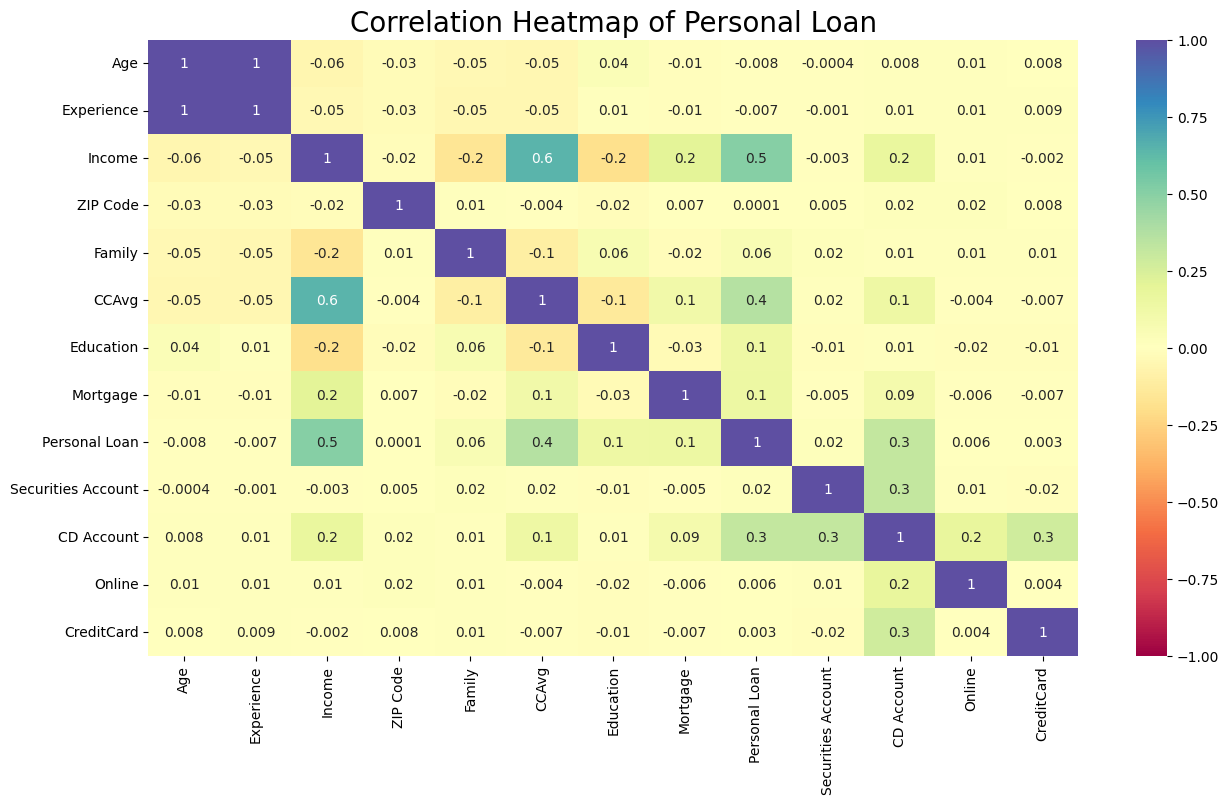

<Figure size 640x480 with 0 Axes>

In [14]:
# Check for correlation of the attributes in the dataframe and plot the heatmap for the same.

bank_df.corr()
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bank_df.corr(), annot=True, vmax=1, vmin=-1, fmt=".1g", cmap="Spectral")
plt.title("Correlation Heatmap of Personal Loan", fontsize=20)
plt.show()

plt.savefig('banks/Correlation_Heatmap.png')

<Figure size 2000x3000 with 0 Axes>

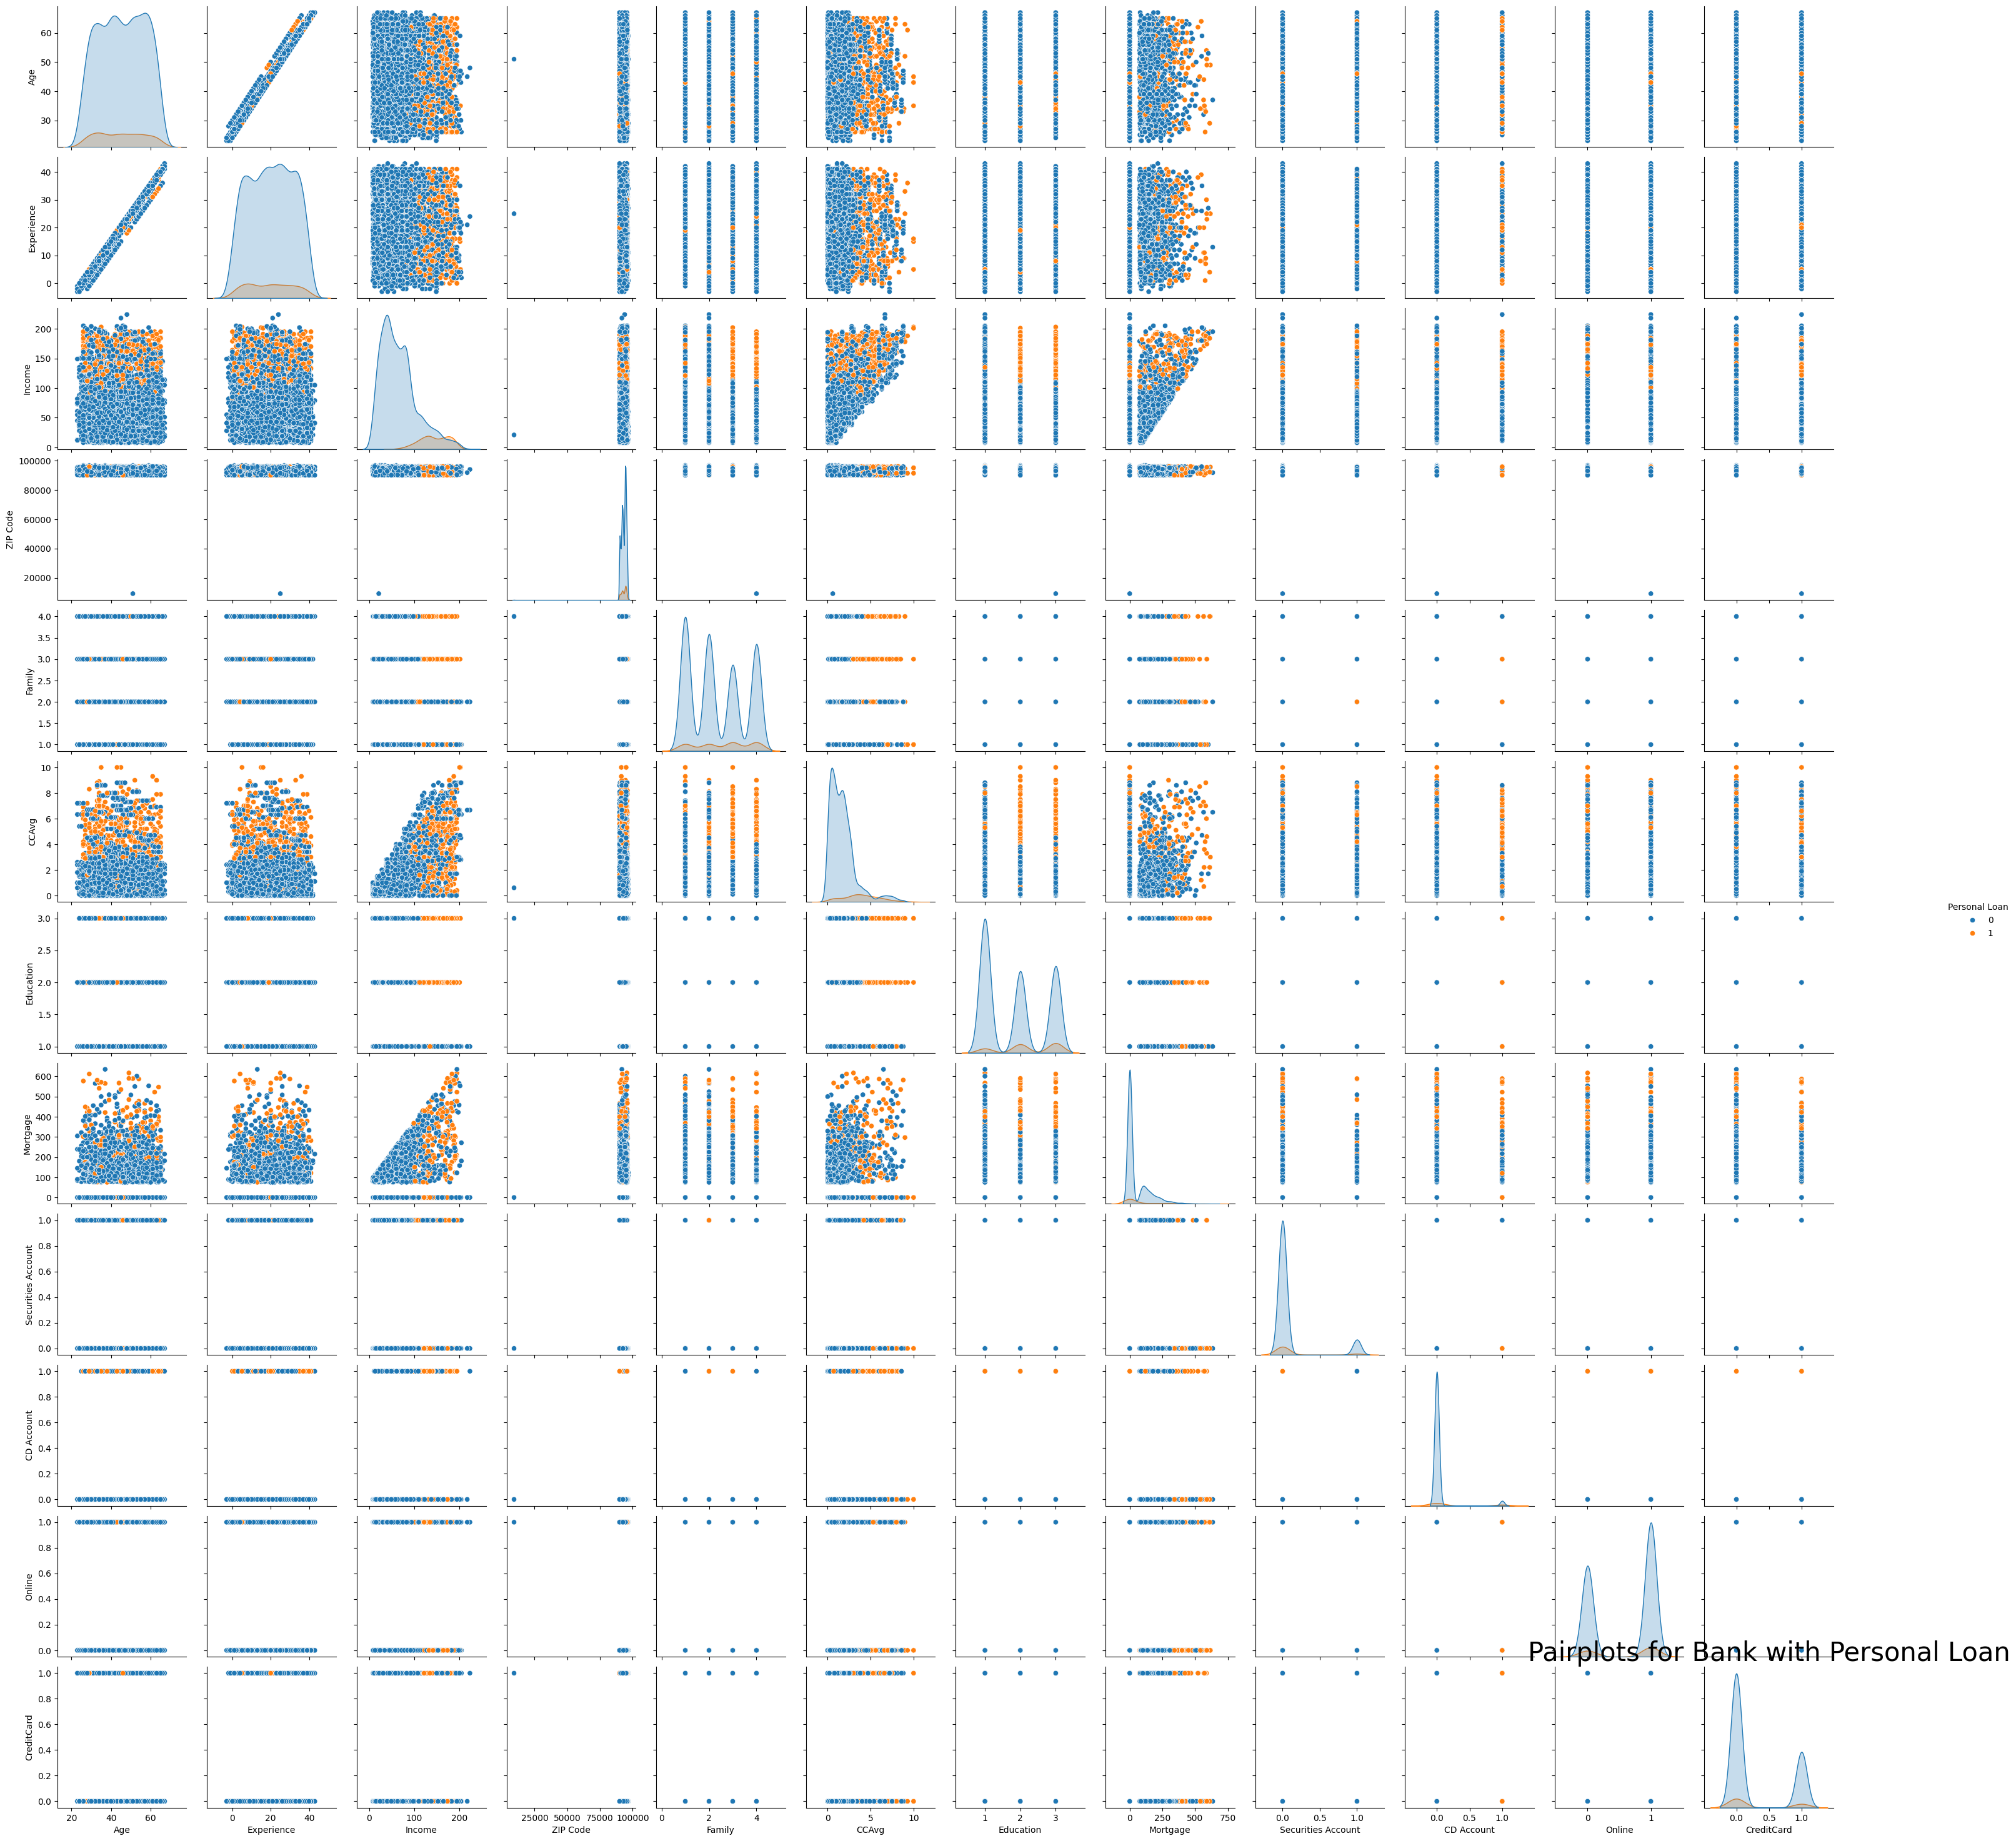

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot a pairplot for the attributes. Use "Personal Loan" as hue.

plt.figure(figsize=(20,30))
sns.pairplot(bank_df, hue='Personal Loan',kind = 'scatter')
plt.title('Pairplots for Bank with Personal Loan',fontsize=30)
plt.show()


plt.savefig('banks/Pairplots.png')

In [16]:
# From the above visualization identify the attributes that are correlated and drop the unnecessary attribute(column)

'''
from the above visualization we can observe that the features
-> ["Age", "Income", Family", "CCAvg", "Education", "Mortgage", "CD Account" ]
are correlated.

so we will include only these features in our model.
'''

new_bank_df = bank_df[['Age', 'Experience', 'Income', 'Family',
                       'CCAvg', 'Education', 'Mortgage','CD Account', 'Personal Loan']]
new_bank_df.head()



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,Personal Loan
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


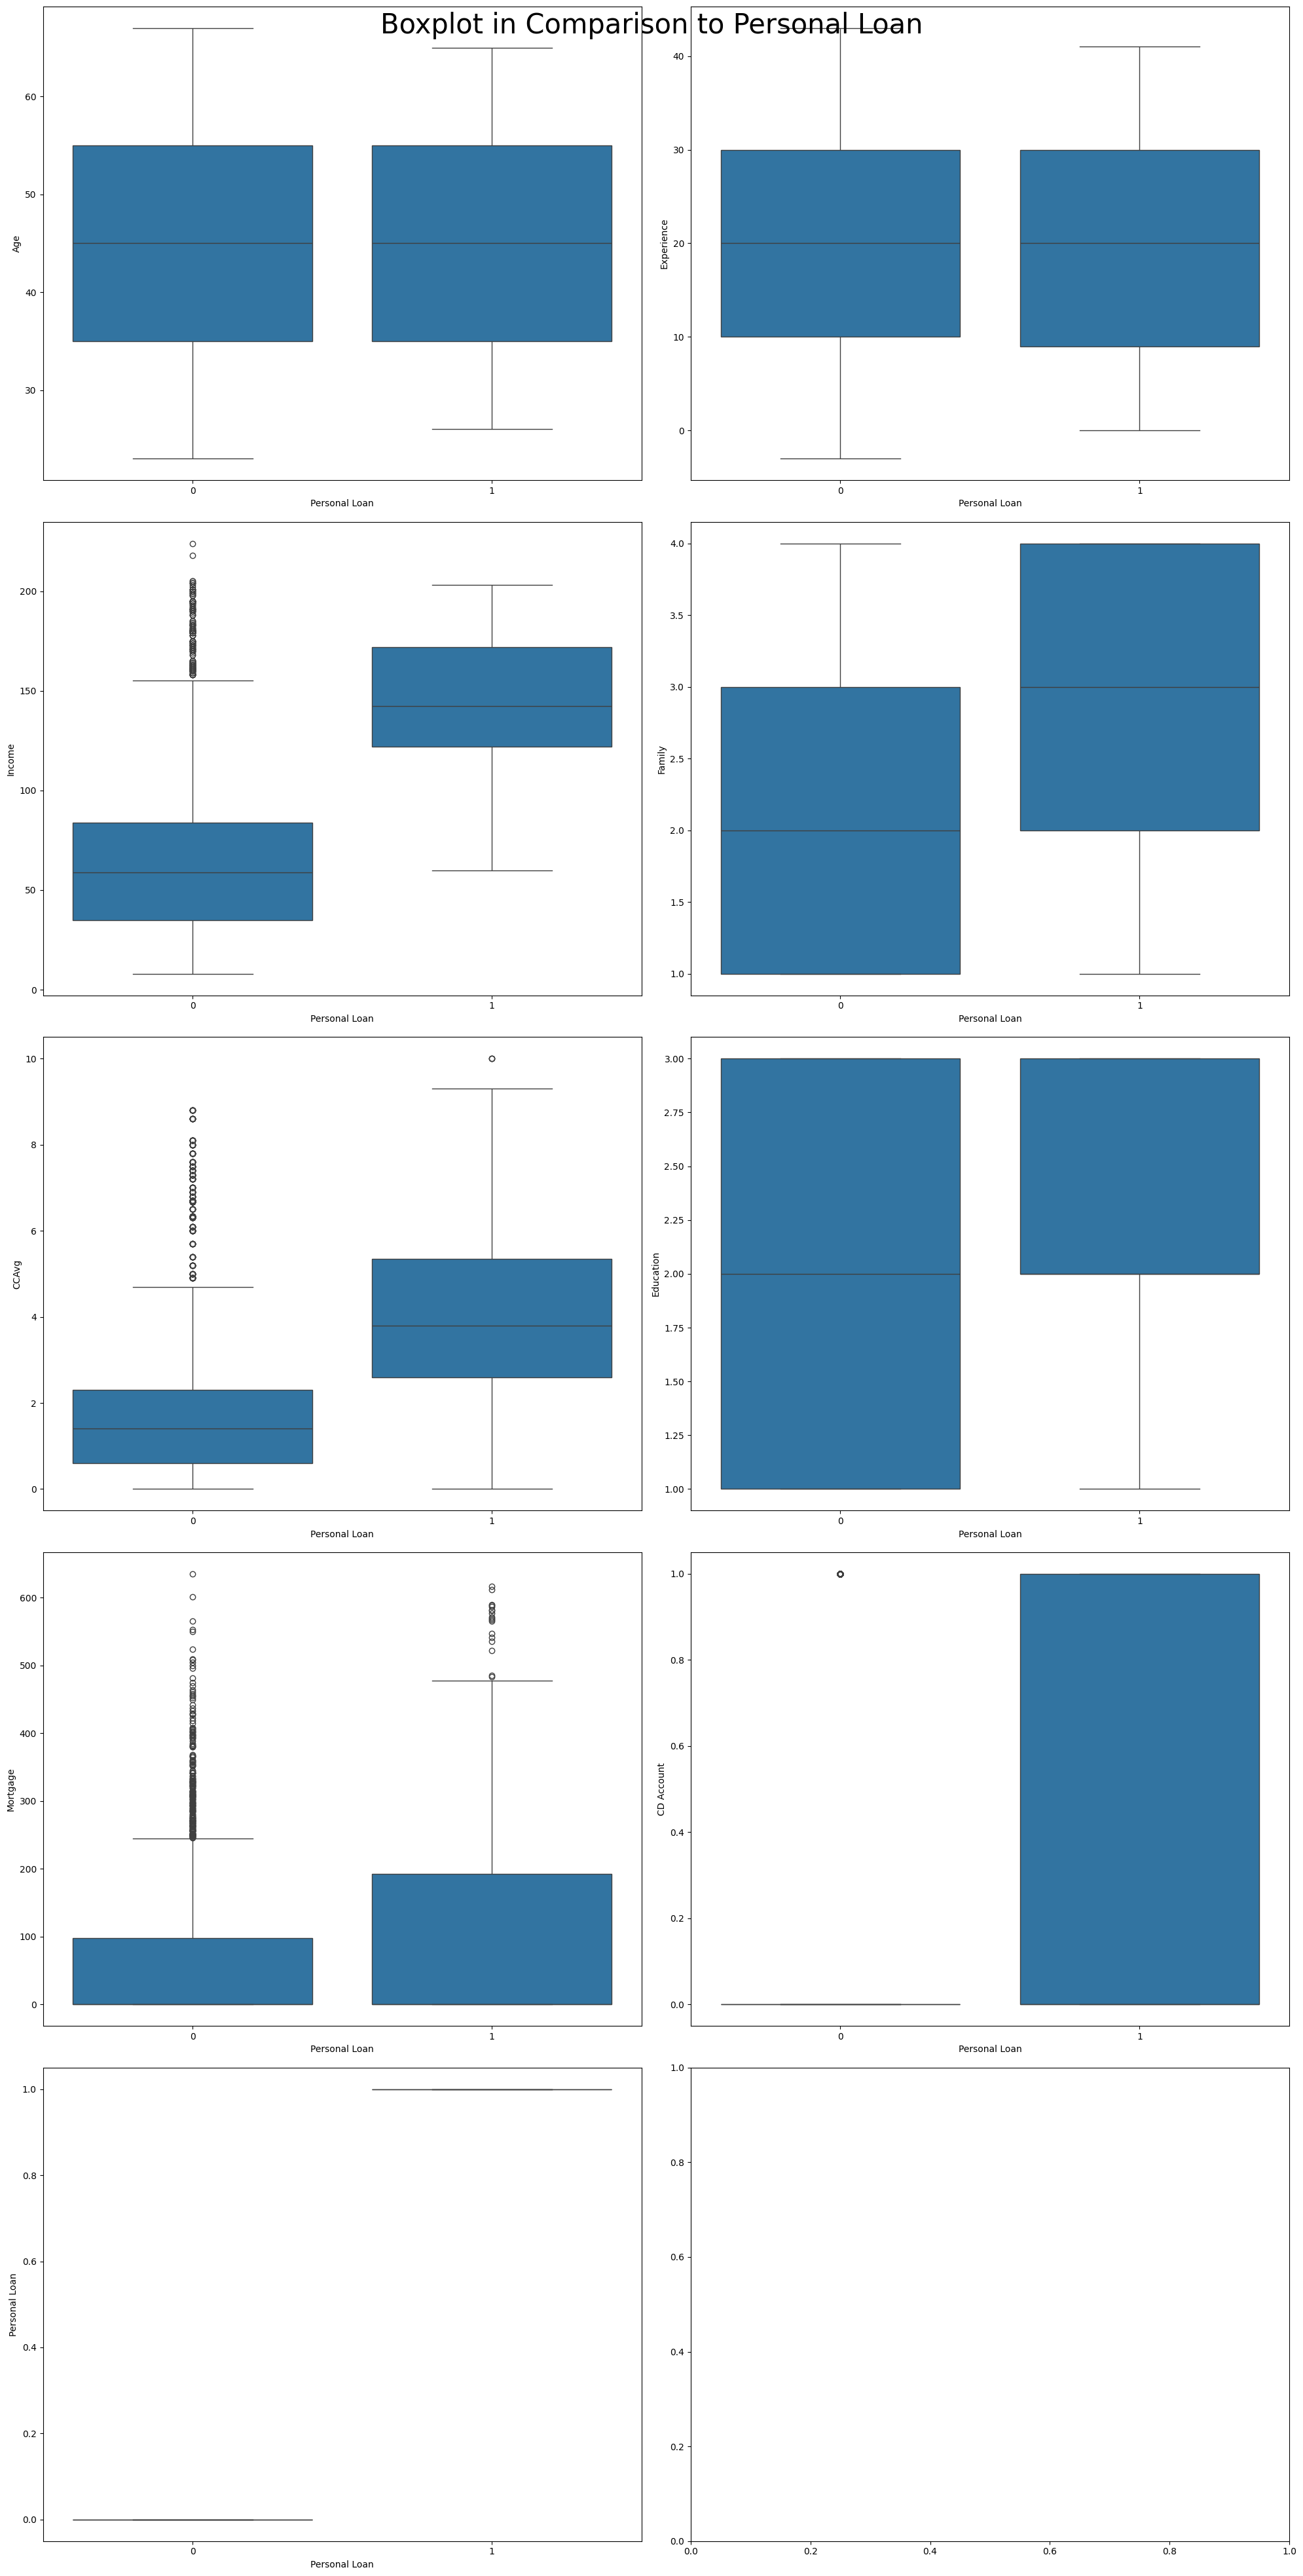

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot a boxplot to understand the distribution of data for the attributes such as "Age", "Income", Family", "CCAvg", "Education", "Mortgage" by taking x axis as "Personal Loan"


ls = new_bank_df.columns
num_plots = len(ls)  # Get the total number of plots

# Calculate rows and columns for subplots (adjust as needed)
num_rows = 5  # Number of rows of subplots
num_cols = 2  # Number of columns of subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))  # Create subplots
fig.suptitle("Boxplot in Comparison to Personal Loan", fontsize=30)  # Overall title

plot_index = 0
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < num_plots:
            sns.boxplot(data=new_bank_df, x='Personal Loan', y=ls[plot_index], ax=axes[i, j])
            plot_index += 1

plt.tight_layout()  # Adjust spacing for better layout
plt.show()

plt.savefig('banks/Boxplots.png')


Unique values for Family: [4 3 1 2]
Unique values for Education: [1 2 3]
Unique values for Personal Loan: [0 1]


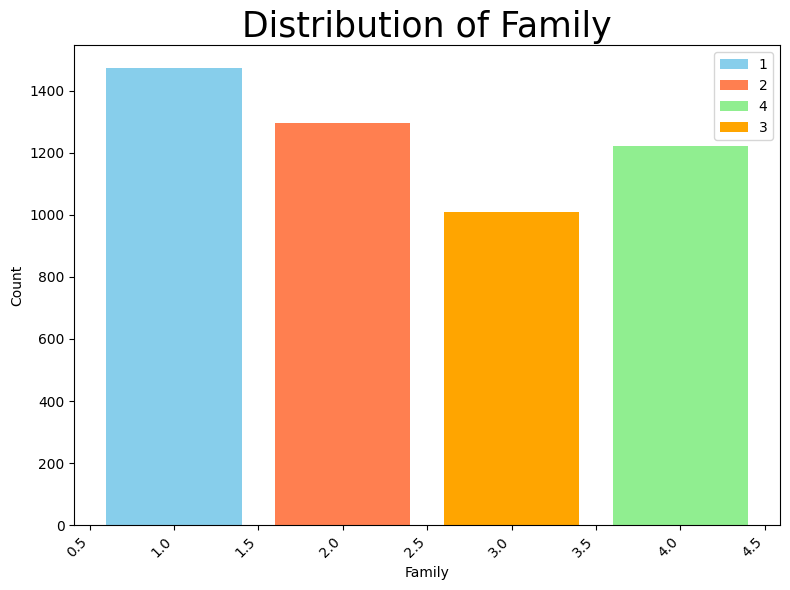

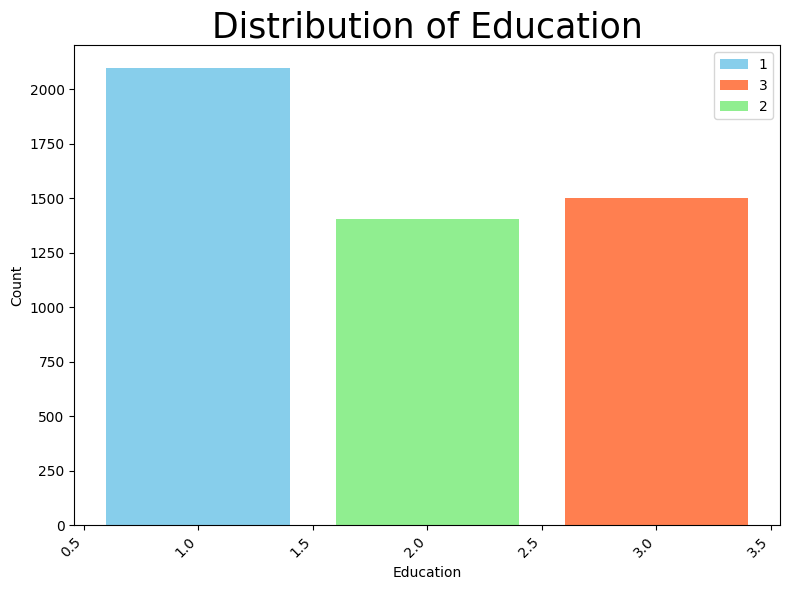

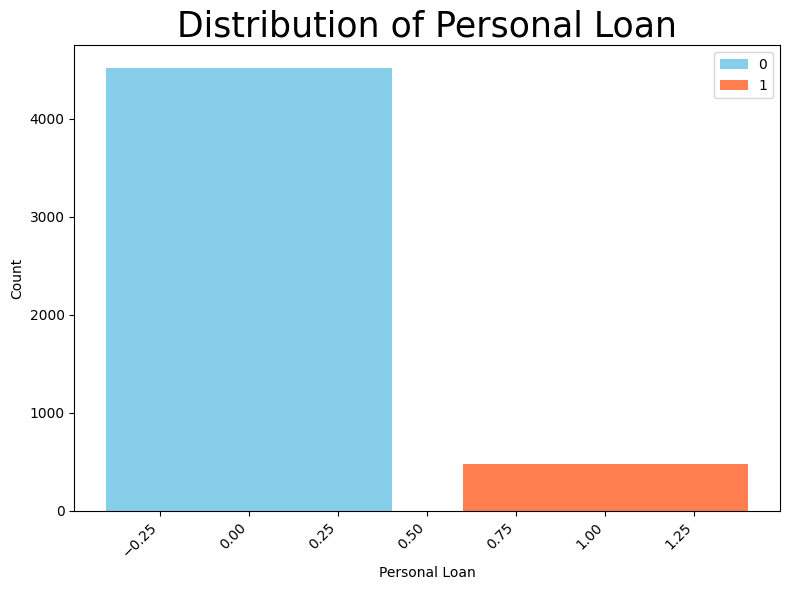

<Figure size 640x480 with 0 Axes>

In [18]:
# Display the unique values of attributes "Family", "Education" and "Personal loan" and plot a bargraph.


# Display unique values
for i in ['Family', 'Education', 'Personal Loan']:
    unique_values = new_bank_df[i].unique()
    print(f"Unique values for {i}: {unique_values}")

# Plot bar graphs with colors using plt.bar()
for i in ['Family', 'Education', 'Personal Loan']:
    value_counts = new_bank_df[i].value_counts()
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    # Define colors for each bar (adjust as needed)
    colors = ['skyblue', 'coral', 'lightgreen', 'orange', 'purple']
    plt.bar(value_counts.index, value_counts.values, label=value_counts.index, color=colors[:len(value_counts)])
    plt.title(f'Distribution of {i}', fontsize=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.legend()
    plt.tight_layout()  # Adjust spacing to prevent overlapping elements
    plt.savefig(f'Bargraph_{i}.png')  # Save each plot with a unique name
    plt.show()


plt.savefig('banks/Bargraphs.png')

## Task 4: Modelling (25Marks)

1. Split data into X and Y. <b>(1Marks)</b>
2. Split the data into training and test set in the ratio of 70:30 respectively <b>(2Marks)</b>
3. Train a Supervised Learning Classification base model using KNN classifier, Naive Bayes and Logistic Regression. Print the train and test accuracy for the same <b>(12Marks)</b>
4. Print the confusion matrix for all the above models <b>(5Marks)</b>
5. Give your reasoning on which is the best model in this case and why it performs better <b>(5Marks)</b>

In [19]:
new_bank_df[new_bank_df["Personal Loan"]==1].value_counts().sum()

np.int64(480)

In [20]:
new_bank_df.shape

(5000, 9)

In [21]:
new_bank_df.isna().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
CD Account,0
Personal Loan,0


In [22]:
# Split data into X and Y.

X = new_bank_df.drop('Personal Loan', axis=1)
y = new_bank_df['Personal Loan']

### Fixing the Imbalanced Dataset with SMOTE

In [23]:
smt = SMOTE()

X_new , y_new = smt.fit_resample(X, y)

print(X_new.shape)
print(y_new.shape)

(9040, 8)
(9040,)


In [24]:
# Count the occurrences of each unique value
value_counts = y_new.value_counts()

# Access the count for 1
count_1 = value_counts.get(1, 0)  # Get count for 1, default to 0 if not found

# Access the count for 0
count_0 = value_counts.get(0, 0)  # Get count for 0, default to 0 if not found

print(f"Number of 1's: {count_1}")
print(f"Number of 0's: {count_0}")

Number of 1's: 4520
Number of 0's: 4520


In [25]:
standard_X = StandardScaler().fit_transform(X_new)
standard_X

array([[-1.77746905, -1.66772561, -1.05954396, ..., -1.18061038,
        -0.56877268, -0.26899929],
       [-0.00428585, -0.07138034, -1.34056482, ..., -1.18061038,
        -0.56877268, -0.26899929],
       [-0.53624081, -0.42612373, -1.77146347, ..., -1.18061038,
        -0.56877268, -0.26899929],
       ...,
       [-1.42283241, -1.40166807,  0.08327419, ...,  0.12748103,
        -0.56877268, -0.26899929],
       [-0.80221829, -0.78086713,  0.3268256 , ...,  0.12748103,
        -0.56877268, -0.26899929],
       [-0.80221829, -0.78086713,  1.5071132 , ...,  0.12748103,
         3.71187229,  3.71748196]])

In [26]:
# Split the data into training and test set in the ratio of 70:30 respectively

X_train, X_test, y_train, y_test = train_test_split(standard_X, y_new, test_size=0.3, random_state=53)

print(f"X Train shape : {X_train.shape}")
print(f"y Train shape : {y_train.shape}")

print(f"X Test shape : {X_test.shape}")
print(f"y Test shape : {y_test.shape}")


X Train shape : (6328, 8)
y Train shape : (6328,)
X Test shape : (2712, 8)
y Test shape : (2712,)


In [27]:
# Train a Supervised Learning Classification base model using KNN classifier, Naive Bayes and Logistic Regression. Print the train and test accuracy for the same


## KNN

In [28]:
# pipeline for knn
knn_pipeline = Pipeline([('knn', KNeighborsClassifier())])

# parameters for knn
parameters_knn = {
    'knn__n_neighbors': [3,5,7] ,
    'knn__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'knn__weights' : ['distance','uniform'],
    'knn__metric' : [ 'minkowski', 'euclidean', 'manhattan', 'chebyshev' ],
    'knn__leaf_size' : [30,50,70],
    'knn__n_jobs' : [-1]
}



In [29]:
# gridsearchcv for KNN

# initializing the gridsearchCV
knn_grid = GridSearchCV(knn_pipeline, parameters_knn, cv=4, scoring='accuracy')

# fitting the model
knn_grid.fit(X_train, y_train)

# getting the best parameters
knn_model = knn_grid.cv_results_
knn_model_df = pd.DataFrame(knn_model)
knn_model_df[knn_model_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__leaf_size,param_knn__metric,param_knn__n_jobs,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
12,0.008990,0.002642,0.110844,0.013114,ball_tree,30,manhattan,-1,3,distance,"{'knn__algorithm': 'ball_tree', 'knn__leaf_siz...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
36,0.003926,0.000133,0.089449,0.005041,ball_tree,50,manhattan,-1,3,distance,"{'knn__algorithm': 'ball_tree', 'knn__leaf_siz...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
60,0.004076,0.000113,0.087640,0.004875,ball_tree,70,manhattan,-1,3,distance,"{'knn__algorithm': 'ball_tree', 'knn__leaf_siz...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
84,0.005253,0.000187,0.044226,0.000153,kd_tree,30,manhattan,-1,3,distance,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
108,0.004731,0.000145,0.051157,0.011628,kd_tree,50,manhattan,-1,3,distance,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
132,0.005590,0.001764,0.044158,0.000426,kd_tree,70,manhattan,-1,3,distance,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
156,0.001624,0.000112,0.094358,0.002162,brute,30,manhattan,-1,3,distance,"{'knn__algorithm': 'brute', 'knn__leaf_size': ...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
180,0.001400,0.000115,0.096393,0.002088,brute,50,manhattan,-1,3,distance,"{'knn__algorithm': 'brute', 'knn__leaf_size': ...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1
204,0.001433,0.000072,0.095279,0.001565,brute,70,manhattan,-1,3,distance,"{'knn__algorithm': 'brute', 'knn__leaf_size': ...",0.972187,0.962705,0.96397,0.965866,0.966182,0.003645,1


In [30]:
best_knn_params =  knn_grid.best_params_
best_knn_params

{'knn__algorithm': 'ball_tree',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__weights': 'distance'}

## Naive Bayes

In [31]:
# pipeline for Naive Bayes
gNB_pipeline = Pipeline([('gnb', GaussianNB())])

# Define parameter grid for GridSearchCV
parameters_gNB = {
    'gnb__var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]  # Tuning GaussianNB
}

In [32]:
# gridsearchcv for KNN
gNB_grid = GridSearchCV(gNB_pipeline, parameters_gNB, cv=5, scoring='accuracy')
gNB_grid.fit(X_train, y_train)

gNB_model = gNB_grid.cv_results_
gNB_model_df = pd.DataFrame(gNB_model)
gNB_model_df[gNB_model_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gnb__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.003576,0.000273,0.002622,0.000947,0.1,{'gnb__var_smoothing': 0.1},0.839652,0.849131,0.821485,0.832411,0.837945,0.836125,0.009089,1


In [33]:
# gaussina naive bayes best parameters
best_gNB_params =  gNB_grid.best_params_
best_gNB_params

{'gnb__var_smoothing': 0.1}

## Logistic Regression

In [34]:
# --- Pipeline Definition ---
logR_pipeline = Pipeline([('logR', LogisticRegression(random_state=53))])

# Create param_grid with conditional logic
logR_params = [
    {
        'logR__penalty': ['l1'],
        'logR__solver': ['liblinear', 'saga'],
        'logR__C': [0.01, 0.1, 1, 10, 100, 1000],
        'logR__class_weight': [None, 'balanced'],
        'logR__max_iter': [100, 200, 500]
    },
    {
        'logR__penalty': ['l2'],
        'logR__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
        'logR__C': [0.01, 0.1, 1, 10, 100, 1000],
        'logR__class_weight': [None, 'balanced'],
        'logR__max_iter': [100, 200, 500]
    },
    {
        'logR__penalty': ['elasticnet'],
        'logR__solver': ['saga'],
        'logR__C': [0.01, 0.1, 1, 10, 100, 1000],
        'logR__class_weight': [None, 'balanced'],
        'logR__max_iter': [100, 200, 500],
        'logR__l1_ratio': [0.25, 0.5, 0.75],
        'logR__n_jobs': [-1]
    },
    {
        'logR__penalty': ['none'],
        'logR__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'logR__C': [0.01, 0.1, 1, 10, 100, 1000],
        'logR__class_weight': [None, 'balanced'],
        'logR__max_iter': [100, 200, 500],
        'logR__n_jobs': [-1]
    },
]


In [35]:

# Fitting the grid search fro logistic regression parameters
logR_grid = GridSearchCV(logR_pipeline, logR_params , cv=5, scoring='accuracy')
logR_grid.fit(X_train, y_train)


# getting the results for logistic regressions
logR_model = logR_grid.cv_results_
logR_model_df = pd.DataFrame(logR_model)
logR_model_df[logR_model_df['rank_test_score']==1]

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logR__C,param_logR__class_weight,param_logR__max_iter,param_logR__penalty,param_logR__solver,param_logR__l1_ratio,param_logR__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
252,0.023287,0.000151,0.001265,0.000038,0.01,None,100,elasticnet,saga,0.25,-1.0,"{'logR__C': 0.01, 'logR__class_weight': None, ...",0.890205,0.886256,0.867299,0.875099,0.884585,0.880689,0.008334,1
253,0.023437,0.000381,0.001476,0.000379,0.01,None,200,elasticnet,saga,0.25,-1.0,"{'logR__C': 0.01, 'logR__class_weight': None, ...",0.890205,0.886256,0.867299,0.875099,0.884585,0.880689,0.008334,1
254,0.023235,0.000099,0.001213,0.000039,0.01,None,500,elasticnet,saga,0.25,-1.0,"{'logR__C': 0.01, 'logR__class_weight': None, ...",0.890205,0.886256,0.867299,0.875099,0.884585,0.880689,0.008334,1


In [36]:
# best parameters for logistic regressions
best_log_params = logR_grid.best_params_
best_log_params

{'logR__C': 0.01,
 'logR__class_weight': None,
 'logR__l1_ratio': 0.25,
 'logR__max_iter': 100,
 'logR__n_jobs': -1,
 'logR__penalty': 'elasticnet',
 'logR__solver': 'saga'}

In [37]:
# Remove the prefixes from the keys in all parameter dictionaries
best_knn_params_cleaned = {k.replace('knn__', ''): v for k, v in best_knn_params.items()}
best_gNB_params_cleaned = {k.replace('gnb__', ''): v for k, v in best_gNB_params.items()}
best_log_params_cleaned = {k.replace('logR__', ''): v for k, v in best_log_params.items()}


# calculating the best model incomparison to the best parameters
knn_model_1 = KNeighborsClassifier(**best_knn_params_cleaned)
gNB_model_1 = GaussianNB(**best_gNB_params_cleaned)
logR_model_1 = LogisticRegression(**best_log_params_cleaned)


# fitting all these models
knn_model_1.fit(X_train, y_train)
gNB_model_1.fit(X_train, y_train)
logR_model_1.fit(X_train, y_train)

# predicting all these models
knn_pred = knn_model_1.predict(X_test)
gNB_pred = gNB_model_1.predict(X_test)
logR_pred = logR_model_1.predict(X_test)


In [38]:
# the overall accuracies for all the models

print(f"KNN Accuracy : {accuracy_score(y_test, knn_pred)}")
print(f"Logistic Regression Accuracy : {accuracy_score(y_test, logR_pred)}")
print(f"Naive Bayes Accuracy : {accuracy_score(y_test, gNB_pred)}")



KNN Accuracy : 0.9738200589970502
Logistic Regression Accuracy : 0.8702064896755162
Naive Bayes Accuracy : 0.8311209439528023


In [39]:
# Print the confusion matrix for all the above models

# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix for KNN:\n", knn_cm)

# Confusion matrix for Naive Bayes
gNB_cm = confusion_matrix(y_test, gNB_pred)
print("Confusion Matrix for Naive Bayes:\n", gNB_cm)

# Confusion matrix for Logistic Regression
logR_cm = confusion_matrix(y_test, logR_pred)
print("Confusion Matrix for Logistic Regression:\n", logR_cm)


Confusion Matrix for KNN:
 [[1337   43]
 [  28 1304]]
Confusion Matrix for Naive Bayes:
 [[1181  199]
 [ 259 1073]]
Confusion Matrix for Logistic Regression:
 [[1183  197]
 [ 155 1177]]


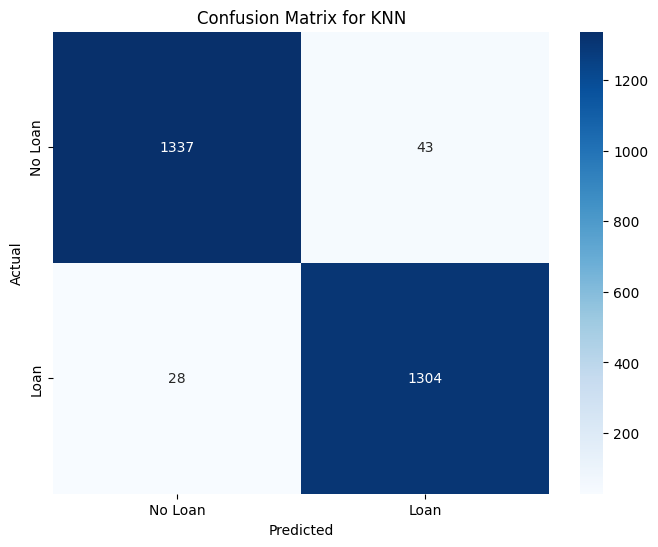

<Figure size 640x480 with 0 Axes>

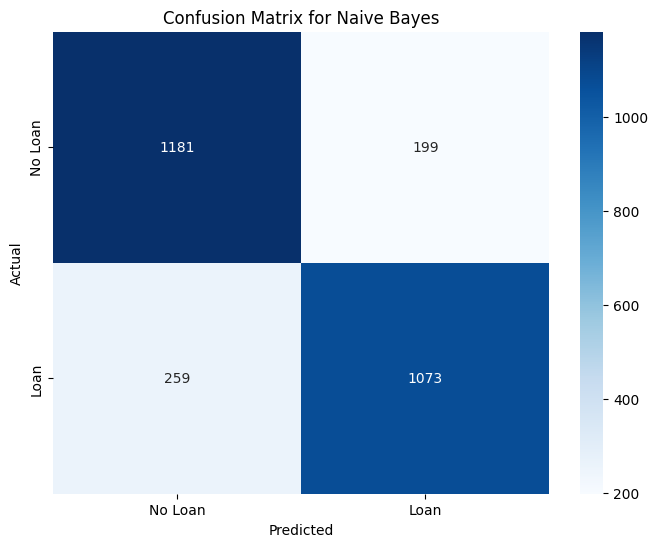

<Figure size 640x480 with 0 Axes>

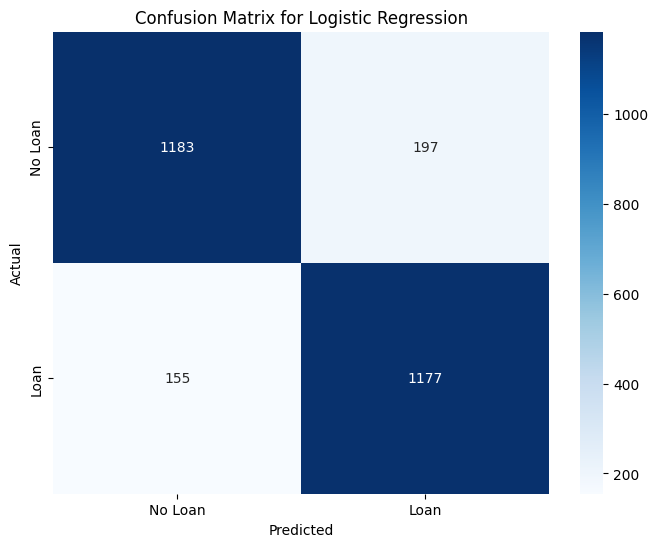

<Figure size 640x480 with 0 Axes>

In [40]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Loan', 'Loan'],
                yticklabels=['No Loan', 'Loan'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(knn_cm, 'KNN')
plt.savefig('KNN_Confusion_Matrix.png')
plot_confusion_matrix(gNB_cm, 'Naive Bayes')
plt.savefig('Naive_Bayes_Confusion_Matrix.png')
plot_confusion_matrix(logR_cm, 'Logistic Regression')
plt.savefig('Logistic_Regression_Confusion_Matrix.png')

In [41]:
# Give your reasoning on which is the best model in this case and why it performs better

'''
As you can see clearly here which performs better here with the accuracy score performing better on
KNN = 97.82%
LogReg = 87.31%
NB = 83.25%

'''

'\nAs you can see clearly here which performs better here with the accuracy score performing better on\nKNN = 97.82%\nLogReg = 87.31%\nNB = 83.25%\n\n'

# 5 . Using Deep Learning (`Tensorflow`)

Building a custom model for the perfect neural network that can actually automate the
* activation functions,
* kernal regularizers ,
* the number of layers ,
* optimizers.

In [42]:
# functions that determines the custom number of layers used and the different types of functions used

def build_model(hp):

  # initializing the model by sequential()
  model = tf.keras.Sequential()

  # addinginput for the nueral network
  model.add(tf.keras.Input(shape = (int(X_train.shape[1]), ) ))

  # Number of layers (between 2 and 10)
  num_layers = hp.Int('num_layers', 2, 10)

  # a for loop for deciding the number of layers that could give the maximum number of accuracy
  for i in range(num_layers):

      # Number of units in the layer (between 32 and 512, step size 32)
      units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)

      # Activation function choice (Swish, LeakyReLU, or ReLU)
      activation_choice = hp.Choice(f'activation_{i}', ['swish', 'leaky_relu', 'relu'])
      if activation_choice == 'swish':
          model.add(tf.keras.layers.Activation('swish'))
      elif activation_choice == 'leaky_relu':
          model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
      else:
          model.add(tf.keras.layers.Activation('relu'))

      # analyzing each layers
      model.add(tf.keras.layers.Dense(units, activation = activation_choice,
                      kernel_regularizer=tf.keras.regularizers.l2(
                          hp.Float(f'l2_reg_{i}', 1e-5, 1e-2, sampling='LOG'))))



      # Optional Dropout layer
      if hp.Boolean(f'dropout_{i}'):
          model.add(tf.keras.layers.Dropout(
              hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.6, step=0.1)))

  # Output layer with sigmoid activation
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # Optimizer and learning rate
  optimizer_choice = hp.Choice('optimizer', ['adam', 'nadam'])
  learning_rate = hp.Choice('learning_rate', [1e-3, 5e-3])

  if optimizer_choice == 'adam':
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  else:
      optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

  # Compile the model
  model.compile(optimizer=optimizer,
                loss=hp.Choice('loss_function', ['binary_crossentropy', 'hinge']),
                metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

  return model




## 5.1 Compiling the defined function and including its compilation


In [43]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective='accuracy',
    max_epochs=50,
    factor=3,
    directory='banks/Personal_Loan_models',
    project_name='loan_NN_model'
)
tuner

## 5.2 Parameter Tuning

In [44]:
# Run hyperparameter search
tuner.search(X_train, y_train, epochs=30,
             validation_data=(X_test, y_test), verbose=1,
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters : ",best_hps)

Trial 90 Complete [00h 01m 09s]
accuracy: 0.5037926435470581

Best accuracy So Far: 0.9619153141975403
Total elapsed time: 00h 41m 42s
Best Hyperparameters :  <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7a2971ea1910>


In [45]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)

# fitting the model
best_model.fit(
    X_train, y_train, epochs=50,
    validation_data=(X_test, y_test),
    verbose = 1, callbacks = [early_stopping]
)

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - AUC: 0.8406 - Precision: 0.6996 - Recall: 0.9522 - accuracy: 0.7589 - loss: 0.7262 - val_AUC: 0.9688 - val_Precision: 0.9256 - val_Recall: 0.8964 - val_accuracy: 0.9137 - val_loss: 0.3136
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.9788 - Precision: 0.9047 - Recall: 0.9422 - accuracy: 0.9202 - loss: 0.2516 - val_AUC: 0.9851 - val_Precision: 0.9578 - val_Recall: 0.8851 - val_accuracy: 0.9244 - val_loss: 0.2070
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9877 - Precision: 0.9511 - Recall: 0.9352 - accuracy: 0.9423 - loss: 0.1827 - val_AUC: 0.9797 - val_Precision: 0.8974 - val_Recall: 0.9459 - val_accuracy: 0.9204 - val_loss: 0.2353
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.9865 - Precision: 0.9425 - Recall: 0.9327 - accuracy: 0.9373 - loss: 0.1809 - val_AUC: 0.9863 - val_Precision: 0.9301 - val_Recall: 0.9287 - val_accuracy: 0.9307 - val_loss: 0.1779
Epoch 5/50
198/198 ━━━━━━━━━━━

In [46]:
# Display best hyperparameters
print("Best Hyperparameters:")
for param in best_hps.values:
    print(f'{param}: {best_hps.get(param)}')

Best Hyperparameters:
num_layers: 10
units_0: 416
activation_0: swish
l2_reg_0: 1.8151218838503474e-05
dropout_0: False
units_1: 448
activation_1: swish
l2_reg_1: 1.3330089024119432e-05
dropout_1: False
optimizer: nadam
learning_rate: 0.001
loss_function: binary_crossentropy
dropout_rate_1: 0.2
units_2: 480
activation_2: relu
l2_reg_2: 1.1068284175502955e-05
dropout_2: False
dropout_rate_2: 0.5
dropout_rate_0: 0.30000000000000004
units_3: 64
activation_3: relu
l2_reg_3: 9.191261178883892e-05
dropout_3: True
units_4: 224
activation_4: leaky_relu
l2_reg_4: 0.0010475693111475634
dropout_4: False
units_5: 288
activation_5: relu
l2_reg_5: 0.0002653027783969455
dropout_5: False
units_6: 128
activation_6: leaky_relu
l2_reg_6: 0.000851529148624536
dropout_6: True
dropout_rate_4: 0.2
dropout_rate_3: 0.4
dropout_rate_5: 0.30000000000000004
units_7: 256
activation_7: leaky_relu
l2_reg_7: 0.000640736630817811
dropout_7: False
dropout_rate_6: 0.4
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/brack